1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = [12, 7]
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

### Задание 1

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.shape

(14999, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пропусков данных нет.

### Задание 2

In [6]:
df[['Work_accident','left','promotion_last_5years','department']] = df[['Work_accident','left','promotion_last_5years',
                                                                        'department']].astype('category')

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [8]:
df['satisfaction_level'].mode()[0]

0.1

In [9]:
df['last_evaluation'].mode()[0]

0.55

In [10]:
df['number_project'].mode()[0]

4

In [11]:
df['average_montly_hours'].mode()[0]

135

In [12]:
df['time_spend_company'].mode()[0]

3

In [13]:
df[['Work_accident','left','promotion_last_5years','department','salary']].describe()

,Work_accident,left,promotion_last_5years,department,salary
count,14999,14999,14999,14999,14999
unique,2,2,2,10,3
top,0,0,0,sales,low
freq,12830,11428,14680,4140,7316


В датафрейме преобладают сотрудники отдела продаж с низким уровнем зарплаты (на уровне компании), большинство сотрудников не повышались за последние 5 лет. Большинство сотрудников не удовлетворены работой, хотя в среднем уровень удовлетворенности выше среднего. В среднем сотрудники работют 3 года и ведут 4 проекта. Большинство сотрудников работают по сменному графику, но есть и сотрудники, которые берут подработки (работают почти каждый день). Время с момента последней оценки  - 6-9 месяцев.
Ошибок в данных на первый взгляд нет.

Проверим данные на выбросы.

In [14]:
q1 = df['satisfaction_level'].quantile(0.25)
q3 = df['satisfaction_level'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['satisfaction_level'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  category
 9   salary                 14999 non-null  object  
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 879.5+ KB


In [15]:
q1 = df['last_evaluation'].quantile(0.25)
q3 = df['last_evaluation'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['last_evaluation'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  category
 9   salary                 14999 non-null  object  
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 879.5+ KB


In [16]:
q1 = df['number_project'].quantile(0.25)
q3 = df['number_project'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['number_project'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  category
 9   salary                 14999 non-null  object  
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 879.5+ KB


In [17]:
q1 = df['average_montly_hours'].quantile(0.25)
q3 = df['average_montly_hours'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['average_montly_hours'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  category
 9   salary                 14999 non-null  object  
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 879.5+ KB


По исследованным выше показателям выбросов нет.

In [18]:
q1 = df['time_spend_company'].quantile(0.25)
q3 = df['time_spend_company'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = df[df['time_spend_company'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13717 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     13717 non-null  float64 
 1   last_evaluation        13717 non-null  float64 
 2   number_project         13717 non-null  int64   
 3   average_montly_hours   13717 non-null  int64   
 4   time_spend_company     13717 non-null  int64   
 5   Work_accident          13717 non-null  category
 6   left                   13717 non-null  category
 7   promotion_last_5years  13717 non-null  category
 8   department             13717 non-null  category
 9   salary                 13717 non-null  object  
dtypes: category(4), float64(2), int64(3), object(1)
memory usage: 804.4+ KB


In [19]:
frame = pd.concat([df, remove_outliers]).drop_duplicates(keep=False)

frame[frame['time_spend_company'].notnull()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
800,0.91,0.97,4,251,6,0,1,0,technical,low
802,0.85,0.82,5,264,6,0,1,0,technical,medium
833,0.89,0.82,5,224,6,0,1,0,RandD,low
838,0.81,0.90,5,238,6,0,1,0,marketing,low
847,0.79,0.94,5,227,6,0,1,0,sales,medium
...,...,...,...,...,...,...,...,...,...,...
10441,0.21,0.69,3,144,6,1,0,0,IT,low
10479,0.86,0.82,3,263,6,0,0,0,sales,high
10537,0.84,0.66,3,114,6,1,0,0,management,low
10548,0.27,0.85,5,142,6,0,0,0,sales,medium


In [20]:
print(remove_outliers['time_spend_company'].mean())
print(remove_outliers['time_spend_company'].median())

3.164686155864985
3.0


In [21]:
print(df['time_spend_company'].mean() - remove_outliers['time_spend_company'].mean())

0.33354705968271814


In [22]:
print(df['time_spend_company'].median() - remove_outliers['time_spend_company'].median())

0.0


Выбросы несущественно влият на базовые статистики, поэтому их оставляем.

Данные в столбце salary носят ранговый характер, для удобства работы с этими ранными переведем их в числовой формат.

In [23]:
df['salary_category'] = pd.factorize(df['salary'])[0]+1
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,salary_category
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,1
14996,0.37,0.53,2,143,3,0,1,0,support,low,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,1


In [24]:
df['Work_accident'] = pd.to_numeric(df['Work_accident'], errors='coerce')
df['left'] = pd.to_numeric(df['left'], errors='coerce')
df['promotion_last_5years'] = pd.to_numeric(df['promotion_last_5years'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  int64   
 6   left                   14999 non-null  int64   
 7   promotion_last_5years  14999 non-null  int64   
 8   department             14999 non-null  category
 9   salary                 14999 non-null  object  
 10  salary_category        14999 non-null  int64   
dtypes: category(1), float64(2), int64(7), object(1)
memory usage: 1.2+ MB


### Задание 3

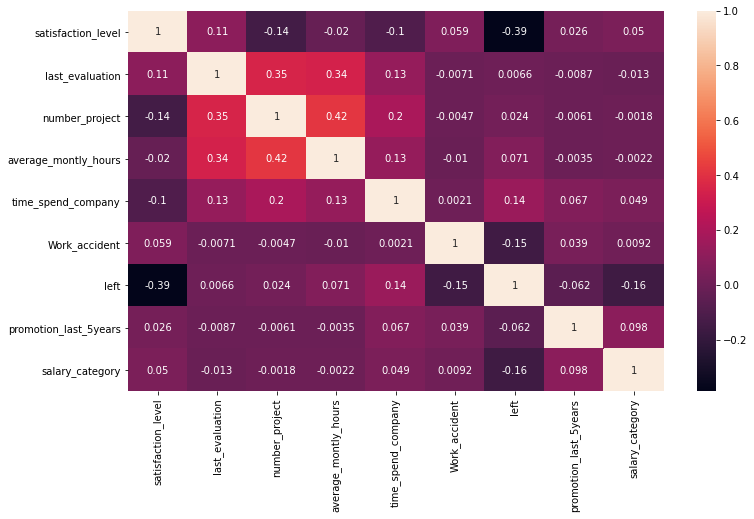

In [25]:
corr_matrix_pearson = df.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot=True)


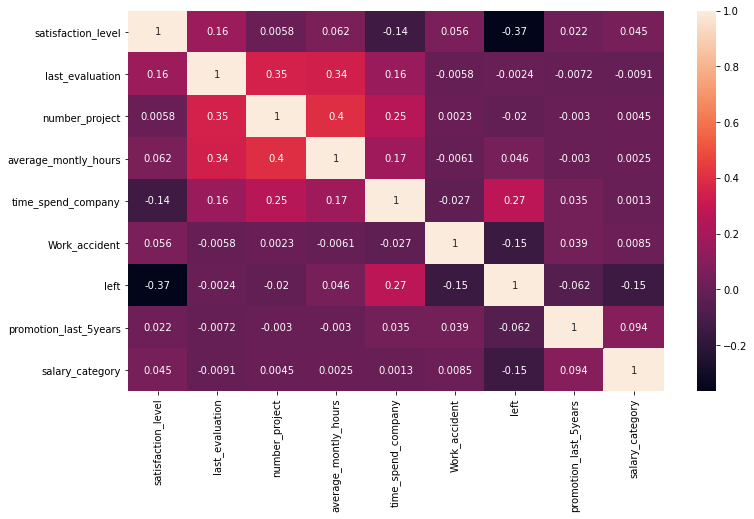

In [26]:
corr_matrix_spearman = df.corr(method='spearman')
sns.heatmap(corr_matrix_spearman, annot=True)


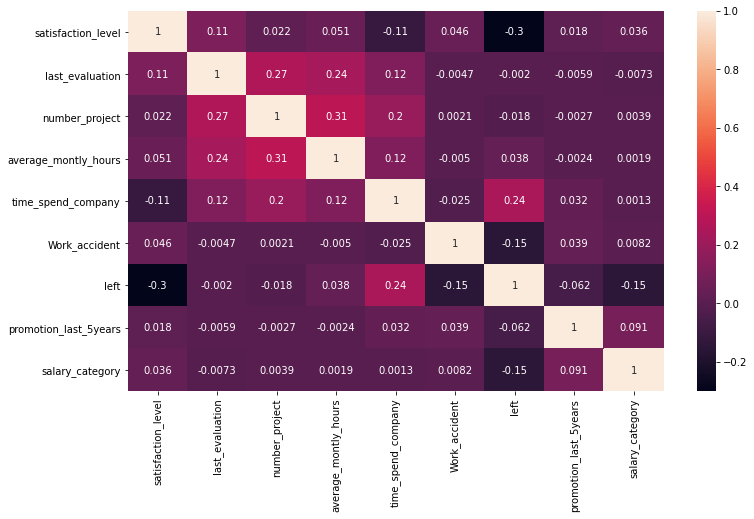

In [27]:
corr_matrix_kendall = df.corr(method='kendall')
sns.heatmap(corr_matrix_kendall, annot=True)

Сильных отличий межу методами не наблюдается. Сильные и даже средние корреляции не обнаружены.
2 наиболее скоррелированные переменные:
1. слабая обратная корреляция между уходом сотрудника из компании и уровнем его удовлетворенности
2. слабая прямая корреляция между средним количеством рабочих часов в месяц и количеством проектов, которые ведет сотрудник

Интересно также рассмотреть следующие корреляции:
1. слабая корреляция между последней оценкой сотрудника и среднем количеством отработанных в месяце часов
2. слабая корреляция между количеством проектов на сотруднике и последней его оценкой
3. слабая корреляция между количеством проектов на сотруднике и стажем работы в компании

2 наименее скоррелированные переменные:
1. уровень зарплаты и среднее количество рабочих часов в месяц
2. уровень зарплаты и стаж работы в компании

### Задание 4

In [28]:
count_by_dep = df[df['left'] == 0].groupby('department').count()[['salary']].rename(columns=
                                                                     {'salary':'count'}).sort_values(by='count',
                                                                                                        ascending=
                                                                                                        False).reset_index()
count_by_dep

,department,count
0,sales,3126
1,technical,2023
2,support,1674
3,IT,954
4,product_mng,704
5,RandD,666
6,marketing,655
7,accounting,563
8,management,539
9,hr,524


Самый многочисленный департамент продаж, самый малочисленный - hr. Расчет производился без учета уволившихся.

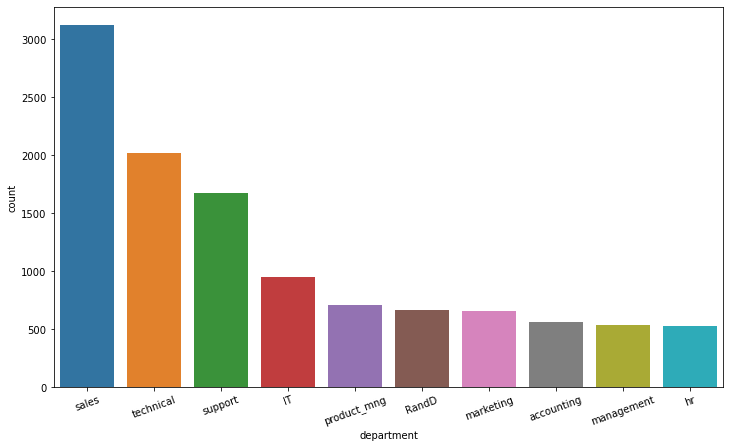

In [29]:
count_bar = sns.barplot(x=count_by_dep['department'], y=count_by_dep['count'], order=count_by_dep['department'])
for item in count_bar.get_xticklabels(): 
    item.set_rotation(20)

### Задание 5

In [30]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [31]:
df.salary.value_counts(normalize=True) * 100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

Сотрудников с высокой зарплатой - 8,2% от общего числа сотрудников в компании, при этом сотрудников с низкой зарплатой в 6 раз больше сотрудников с высокой зарплатой.

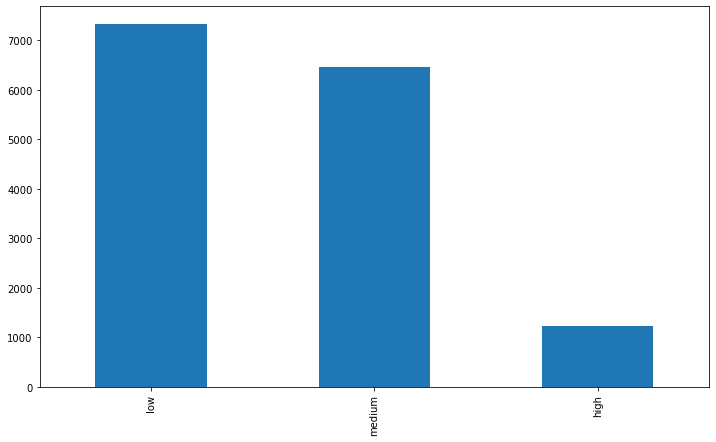

In [32]:
df.salary.value_counts().plot(kind='bar')

### Задание 6

In [33]:
salary_by_dep = df.groupby(['department', 'salary']).count()[['salary_category']].rename(columns={"salary_category":
                                                                                                  "count_by_salary"}).reindex(
    level=1, index = ['high', 'medium', 'low'])
salary_by_dep

count_by_salary
department  salary                 
IT          high                 83
            medium              535
            low                 609
RandD       high                 51
            medium              372
            low                 364
accounting  high                 74
            medium              335
            low                 358
hr          high                 45
            medium              359
            low                 335
management  high                225
            medium              225
            low                 180
marketing   high                 80
            medium              376
            low                 402
product_mng high                 68
            medium              383
            low                 451
sales       high                269
            medium             1772
            low                2099
support     high                141
            medium              942
            low                1146
technical   high                201
            medium             1147
            low                1372

In [34]:
salary_by_dep.unstack('salary')

count_by_salary             
salary                 high medium   low
department                              
IT                       83    535   609
RandD                    51    372   364
accounting               74    335   358
hr                       45    359   335
management              225    225   180
marketing                80    376   402
product_mng              68    383   451
sales                   269   1772  2099
support                 141    942  1146
technical               201   1147  1372

Наибольшее количество сотрудников с высокими зарплатами в департаменте продаж, наименьшее - в hr.

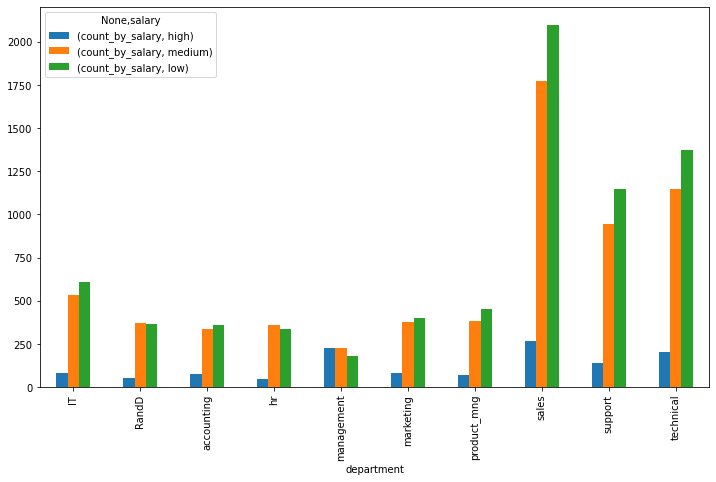

In [35]:

salary_by_dep.unstack('salary').plot(kind='bar')

### Задание 7

In [36]:
df[df['salary_category']==3]['average_montly_hours'].mean()

199.86742118027485

In [37]:
df[df['salary_category']==1]['average_montly_hours'].mean()

200.9965828321487

Н0: сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе одинаковое количество времени

Н1: сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе разное количество времени

In [38]:
alpha = 0.05
result = stats.ttest_ind(df[df['salary_category']==3]['average_montly_hours'], df[df['salary_category']==
                                                                                  1]['average_montly_hours'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('\n Отвергаем нулевую гипотезу, сотрудники с высоким окладом и сотрудники с низким окладом проводят на работе разное количество времени')
else:
    print('\n Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)

 Не отвергаем нулевую гипотезу


### Задание 8

In [39]:
df.groupby('left')[['satisfaction_level','number_project']].mean()

,satisfaction_level,number_project
left,,
0,0.666810,3.786664
1,0.440098,3.855503


In [40]:
df.groupby('left')['promotion_last_5years'].value_counts(normalize = True) * 100


left  promotion_last_5years
0     0                        97.374869
      1                         2.625131
1     0                        99.467936
      1                         0.532064
Name: promotion_last_5years, dtype: float64

In [41]:
df.groupby('left')['promotion_last_5years'].mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

In [42]:
print(stats.ttest_ind(df[df['left']==1]['satisfaction_level'], df[df['left']==0]['satisfaction_level']))
print(stats.ttest_ind(df[df['left']==1]['number_project'], df[df['left']==0]['number_project']))
print(stats.ttest_ind(df[df['left']==1]['promotion_last_5years'], df[df['left']==0]['promotion_last_5years']))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)
Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)
Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)


Видим, что уровень удовлетворенности у уволившихя меньше, чем у оставшихся. 

Также видим, что уволившиеся в среднем больше часов работали в месяц.

Уволивщиеся намного реже получали повышение за последние 5 лет.

T-test показал, что разница в средних не обусловлена случаными колебаниями (p-value < 0.05).

### Задание 9

In [181]:
data = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company',
             'Work_accident','promotion_last_5years','salary_category']]
result = df['left']


In [182]:
df[['Work_accident','left','promotion_last_5years','salary_category']] = df[['Work_accident',
                                                                             'left','promotion_last_5years','salary_category']].astype('category')

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
import numpy as np

In [184]:
# разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=0.25)

In [185]:
lda = LinearDiscriminantAnalysis()

In [186]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [187]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [188]:
# смотрим разницу факта и прогноза
y_pr = []
for el in y_pred.flat:
    y_pr.append(el)
se = pd.Series(y_pr)
res = pd.DataFrame(y_test)
res['left_pred'] = se.values
res['left_pred'] = res['left_pred'].astype('category')
res


,left,left_pred
14971,1,0
643,1,0
8978,0,0
9031,0,0
4635,0,0
...,...,...
2603,0,0
11305,0,0
3510,0,0
225,1,0


In [189]:
res.describe()

,left,left_pred
count,3750,3750
unique,2,2
top,0,0
freq,2833,3275


In [190]:
from sklearn.metrics import accuracy_score

In [191]:
# оценка точности модели
accuracy_score(y_test, lda.predict(X_test)) * 100

76.42666666666666

In [192]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.51568914e+00,  6.82565473e-01, -2.30166890e-01,
         4.44511420e-03,  2.60887244e-01, -1.08000753e+00,
        -8.94131498e-01, -6.37514095e-01]])